#Theoretical

**1)What is Boosting in Machine Learning?**

Ans)Boosting is an ensemble learning method that sequentially builds a strong learner from a series of weak learners. It works by training weak models in a sequence, where each new model corrects the errors of the previous ones, progressively reducing bias.

**2)How does Boosting differ from Bagging?**

Ans)Boosting trains models sequentially, focusing on misclassified instances from previous models to reduce bias. Bagging trains models independently and in parallel, then averages their predictions to reduce variance.

**3)What is the key idea behind AdaBoost?**

Ans)The key idea behind AdaBoost is to assign higher weights to misclassified samples at each iteration, forcing subsequent weak learners to focus more on these difficult examples. It then combines the weak learners' predictions using weights based on their accuracy.

**4)Explain the working of AdaBoost with an example.**

Ans)AdaBoost starts with equal weights for all samples. In each iteration, a weak learner is trained. Samples misclassified by this learner get increased weights for the next iteration. This process repeats, and the final prediction is a weighted sum of all weak learners' predictions.

**5)What is Gradient Boosting, and how is it different from AdaBoost?**

Ans)Gradient Boosting builds an ensemble of weak learners sequentially, where each new tree is trained to predict the residuals of the previous ensemble. AdaBoost focuses on re-weighting misclassified samples, while Gradient Boosting directly optimizes a loss function by predicting negative gradients.

**6)What is the loss function in Gradient Boosting?**

Ans)The loss function in Gradient Boosting is a differentiable function that quantifies the error between the predicted and actual values. Common choices include mean squared error for regression and log loss for classification.

**7)How does XGBoost improve over traditional Gradient Boosting?**

Ans)XGBoost improves traditional Gradient Boosting by incorporating regularization, handling missing values, allowing parallel processing during tree construction, and implementing tree pruning and an optimized objective function. It also offers flexibility in choosing objective functions.

**8)What is the difference between XGBoost and CatBoost?**

Ans)XGBoost is a general-purpose gradient boosting framework known for its speed and performance, requiring careful handling of categorical features. CatBoost is specifically designed to handle categorical features efficiently and automatically, using ordered boosting and novel categorical feature encoding schemes.

**9)What are some real-world applications of Boosting techniques?**

Ans)Boosting techniques are widely used in various applications like fraud detection, customer churn prediction, recommendation systems, medical diagnosis, spam detection, and image recognition, where high accuracy and predictive power are crucial.

**10)How does regularization help in XGBoost?**

Ans)Regularization in XGBoost helps prevent overfitting by penalizing complex models. L1 adds a penalty proportional to the absolute value of coefficients, encouraging sparsity. L2 adds a penalty proportional to the square of coefficients, shrinking them and making the model more robust.

**11)What are some hyperparameters to tune in Gradient Boosting models?**

Ans)Key hyperparameters to tune in Gradient Boosting include n_estimators, learning_rate, max_depth, subsample, and colsample_bytree.

**12)What is the concept of Feature Importance in Boosting?**

Ans)Feature Importance in Boosting quantifies the contribution of each feature to the model's predictions. It's often calculated based on how many times a feature is used in splits across all trees in the ensemble or by the gain in purity it provides.

**13)Why is CatBoost efficient for categorical data?**

Ans)CatBoost is efficient for categorical data because it incorporates novel techniques like ordered boosting and ordered target encoding. It handles categorical features directly without requiring extensive preprocessing, reducing information loss and improving model performance.

#Practical

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.5 MB/s eta 0:00:00


**14)Train an AdaBoost Classifier on a sample dataset and print model accuracy?**

In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_estimator_ada = DecisionTreeClassifier(max_depth=1, random_state=42)
adaboost_clf = AdaBoostClassifier(estimator=base_estimator_ada, n_estimators=100, random_state=42)
adaboost_clf.fit(X_train, y_train)
y_pred_ada = adaboost_clf.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Classifier Accuracy: {accuracy_ada:.3f}")

AdaBoost Classifier Accuracy: 0.974


**15)Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)?**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

X_reg, y_reg = make_regression(n_samples=1000, n_features=10, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
ada_reg = AdaBoostRegressor(n_estimators=50, random_state=42)
ada_reg.fit(X_train_reg, y_train_reg)
print("AdaBoost MAE:", mean_absolute_error(y_test_reg, ada_reg.predict(X_test_reg)))

AdaBoost MAE: 52.76212987370456


**16)Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance?**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbclf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbclf.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gbclf.predict(X_test)))

Gradient Boosting Accuracy: 0.956140350877193


**17)Train a Gradient Boosting Regressor and evaluate using R-Squared Score?**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

gbreg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbreg.fit(X_train_reg, y_train_reg)
print("Gradient Boosting R-Squared:", r2_score(y_test_reg, gbreg.predict(X_test_reg)))

Gradient Boosting R-Squared: 0.9194284378734666


**18)Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting?**

In [ ]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

xgbclf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgbclf.fit(X_train, y_train)
print("XGBoost Accuracy:", accuracy_score(y_test, xgbclf.predict(X_test)))

XGBoost Accuracy: 0.956140350877193


**19)Train a CatBoost Classifier and evaluate using F1-Score?**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

catclf = CatBoostClassifier(iterations=100, verbose=False)
catclf.fit(X_train, y_train)
print("CatBoost F1 Score:", f1_score(y_test, catclf.predict(X_test)))

CatBoost F1 Score: 0.9722222222222222


**20)Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)?**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgbreg = XGBRegressor(n_estimators=100)
xgbreg.fit(X_train_reg, y_train_reg)
print("XGBoost MSE:", mean_squared_error(y_test_reg, xgbreg.predict(X_test_reg)))

XGBoost MSE: 2205.7439569664366


**21)Train an AdaBoost Classifier and visualize feature importance?**

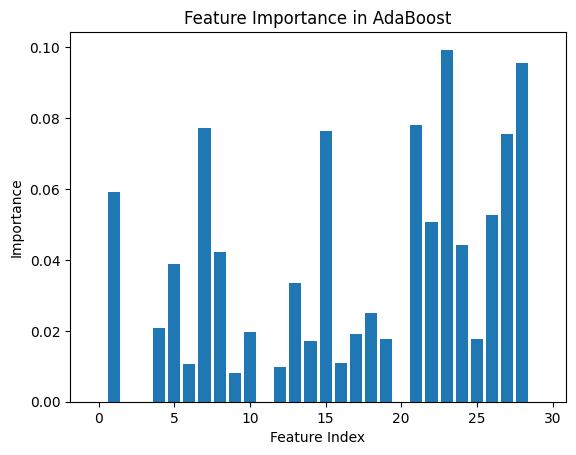

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(len(adaboost_clf.feature_importances_)), adaboost_clf.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance in AdaBoost")
plt.show()

**22)Train a Gradient Boosting Regressor and plot learning curves?**

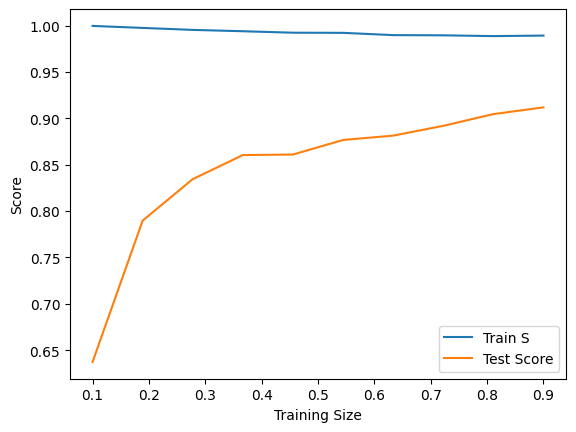

In [ ]:
import numpy as np

train_sizes = np.linspace(0.1, 0.9, 10)
train_scores, test_scores = [], []

for size in train_sizes:
    X_train_small, _, y_train_small, _ = train_test_split(X_train_reg, y_train_reg, train_size=size, random_state=42)
    gbreg.fit(X_train_small, y_train_small)
    train_scores.append(gbreg.score(X_train_small, y_train_small))
    test_scores.append(gbreg.score(X_test_reg, y_test_reg))
plt.plot(train_sizes, train_scores, label="Train S")
plt.plot(train_sizes, test_scores, label="Test Score")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend()
plt.show()

**23)Train an XGBoost Classifier and visualize feature importance?**

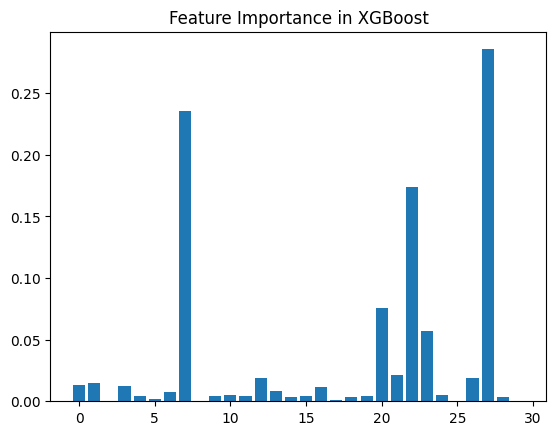

In [ ]:
xgbimportance = xgbclf.feature_importances_
plt.bar(range(len(xgbimportance)), xgbimportance)
plt.title("Feature Importance in XGBoost")
plt.show()

**24)Train a CatBoost Classifier and plot the confusion matrix?**

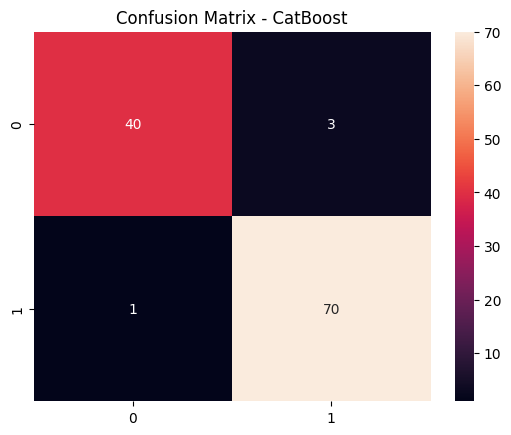

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, catclf.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - CatBoost")
plt.show()

**25)Train an AdaBoost Classifier with different numbers of estimators and compare accuracy?**

In [ ]:
for n in [10, 50, 100, 200]:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    print(f"Estimators: {n}, Accuracy: {accuracy_score(y_test, model.predict(X_test))}")

Estimators: 10, Accuracy: 0.9649122807017544
Estimators: 50, Accuracy: 0.9649122807017544
Estimators: 100, Accuracy: 0.9736842105263158
Estimators: 200, Accuracy: 0.9736842105263158


**26)Train a Gradient Boosting Classifier and visualize the ROC curve?**

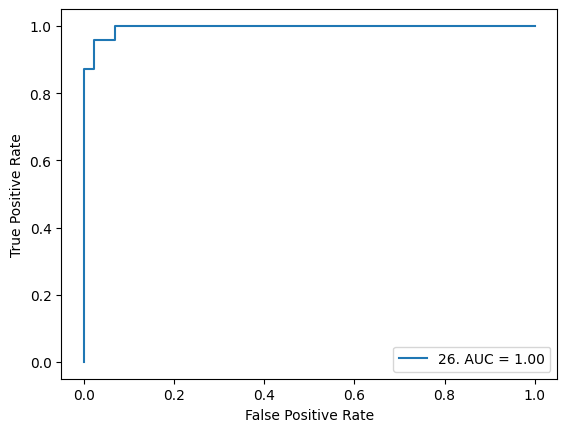

In [ ]:
from sklearn.metrics import roc_curve, auc

y_scores = gbclf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"26. AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

**27)Train an XGBoost Regressor and tune the learning rate using GridSearchCV?**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.1, 0.2]}
grid_search = GridSearchCV(XGBRegressor(n_estimators=100), param_grid, cv=3)
grid_search.fit(X_train_reg, y_train_reg)
print("Best Learning Rate:", grid_search.best_params_['learning_rate'])

Best Learning Rate: 0.1


**28)Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting?**

In [ ]:
cat_clf_balanced = CatBoostClassifier(class_weights=[1, 3], iterations=100, verbose=False)
cat_clf_balanced.fit(X_train, y_train)
print("Balanced F1 Score:", f1_score(y_test, cat_clf_balanced.predict(X_test)))

Balanced F1 Score: 0.9722222222222222


**29)Train an AdaBoost Classifier and analyze the effect of different learning rates?**

In [ ]:
for lr in [0.01, 0.1, 0.5, 1]:
    model = AdaBoostClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    print(f"Learning Rate: {lr}, Accuracy: {accuracy_score(y_test, model.predict(X_test))}")

Learning Rate: 0.01, Accuracy: 0.9385964912280702
Learning Rate: 0.1, Accuracy: 0.956140350877193
Learning Rate: 0.5, Accuracy: 0.9649122807017544
Learning Rate: 1, Accuracy: 0.9649122807017544


**30)Train an XGBoost Classifier for multi-class classification and evaluate using log-loss?**

In [ ]:
from sklearn.metrics import log_loss

xgb_multi = XGBClassifier(objective="binary:logistic", eval_metric="logloss")
xgb_multi.fit(X_train, y_train)
print("Log Loss:", log_loss(y_test, xgb_multi.predict_proba(X_test)))

Log Loss: 0.12201097351759238
